In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
np.random.seed(0)
n_points_per_cluster = 250

C1 = [-5, -2] + .8 * np.random.randn(n_points_per_cluster, 2)
C2 = [4, -1] + .1 * np.random.randn(n_points_per_cluster, 2)
C3 = [1, -2] + .2 * np.random.randn(n_points_per_cluster, 2)
C4 = [-2, 3] + .3 * np.random.randn(n_points_per_cluster, 2)
C5 = [3, -2] + 1.6 * np.random.randn(n_points_per_cluster, 2)
C6 = [5, 6] + 2 * np.random.randn(n_points_per_cluster, 2)
X = np.vstack((C1, C2, C3, C4, C5, C6))

In [4]:
class DBSCAN:
    def __init__(self, eps=0.5, min_samples=5):
        self.eps = eps
        self.min_samples = min_samples

    def _euclidean_distance(self, a, b):
        return np.sqrt(np.sum((a - b)**2))

    def _region_query(self, point_id):
        neighbors = []
        for i in range(len(self.X)):
            if self._euclidean_distance(self.X[point_id], self.X[i]) < self.eps:
                neighbors.append(i)
        return neighbors

    def fit(self, X):
        self.X = X
        self.labels_ = [0]*len(X)
        cluster_id = 0

        for point_id in range(len(X)):
            if not self.labels_[point_id] == 0:
                continue
            neighbors = self._region_query(point_id)
            if len(neighbors) < self.min_samples:
                self.labels_[point_id] = -1
            else:
                cluster_id += 1
                self._expand_cluster(point_id, neighbors, cluster_id)

    def _expand_cluster(self, point_id, neighbors, cluster_id):
        self.labels_[point_id] = cluster_id
        i = 0
        while i < len(neighbors):
            point = neighbors[i]
            if self.labels_[point] == -1:
                self.labels_[point] = cluster_id
            elif self.labels_[point] == 0:
                self.labels_[point] = cluster_id
                point_neighbors = self._region_query(point)
                if len(point_neighbors) >= self.min_samples:
                    neighbors = neighbors + point_neighbors
            i += 1

In [5]:
dbscan = DBSCAN(eps=0.9, min_samples=5)
dbscan.fit(X)

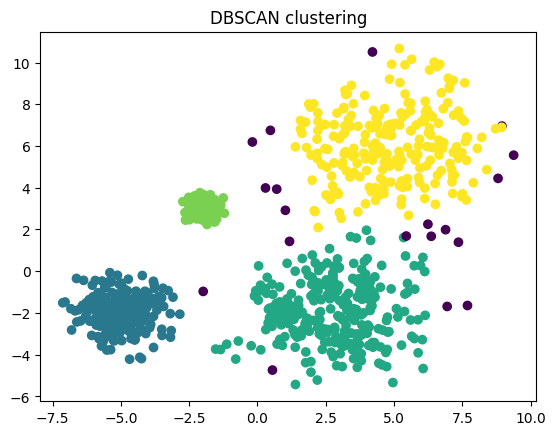

In [6]:
plt.scatter(X[:,0], X[:,1], c=dbscan.labels_, cmap='viridis')
plt.title('DBSCAN clustering')
plt.show()